In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd ~/.kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

In [27]:
ls -al

total 13927
-rw------- 1 root root     5568 Mar 19 06:56  assignment_week3.ipynb
-rw------- 1 root root 10713856 Jun 10 17:03  best_model.h5
-rw------- 1 root root    42954 May 28 05:15  chap8.ipynb
-rw------- 1 root root   128771 Oct 22  2023 'Colaboratory에 오신 것을 환영합니다의 사본'
-rw------- 1 root root   128771 Oct 22  2023 'Colaboratory에 오신 것을 환영합니다의 사본 (1)'
drwx------ 2 root root     4096 Apr  2 05:13  covid19/
drwx------ 2 root root     4096 May 28 02:49  ecg/
-rw------- 1 root root   299579 Jun 10 17:10  finalProject.ipynb
drwx------ 2 root root     4096 Apr  2 04:49  .ipynb_checkpoints/
-rw------- 1 root root       68 Jun  4 05:35  kaggle.json
drwx------ 3 root root     4096 May 28 05:11  pknu-deep-learning-2024/
drwx------ 2 root root     4096 May 24 10:01  svc2004/
-rw------- 1 root root     5413 Jun 10 17:10  test_predict.csv
drwx------ 2 root root     4096 Apr  2 04:49  titanic/
-rw------- 1 root root      734 Apr  2 05:17  Untitled0.ipynb
-r

In [5]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [35]:
cd /content/gdrive/MyDrive/Colab Notebooks

/content/gdrive/MyDrive/Colab Notebooks


In [7]:
ls -al

total 3406
-rw------- 1 root root    5568 Mar 19 06:56  assignment_week3.ipynb
-rw------- 1 root root   42954 May 28 05:15  chap8.ipynb
-rw------- 1 root root  128771 Oct 22  2023 'Colaboratory에 오신 것을 환영합니다의 사본'
-rw------- 1 root root  128771 Oct 22  2023 'Colaboratory에 오신 것을 환영합니다의 사본 (1)'
drwx------ 2 root root    4096 Apr  2 05:13  covid19/
drwx------ 2 root root    4096 May 28 02:49  ecg/
-rw------- 1 root root  239746 Jun 10 16:57  finalProject.ipynb
drwx------ 2 root root    4096 Apr  2 04:49  .ipynb_checkpoints/
-rw------- 1 root root      68 Jun  4 05:35  kaggle.json
drwx------ 2 root root    4096 May 28 05:11  pknu-deep-learning-2024/
drwx------ 2 root root    4096 May 24 10:01  svc2004/
-rw------- 1 root root    5413 Jun  4 05:41  test_predict.csv
drwx------ 2 root root    4096 Apr  2 04:49  titanic/
-rw------- 1 root root     734 Apr  2 05:17  Untitled0.ipynb
-rw------- 1 root root  277114 Apr 23 07:54  Untitled1.ipynb
-rw------- 1 roo

In [8]:
ls '/content/gdrive/MyDrive/Colab Notebooks/pknu-deep-learning-2024/rowdata/rowdata/Train' | wc -l

800


In [9]:
folderpath = '/content/gdrive/MyDrive/Colab Notebooks/pknu-deep-learning-2024/rowdata/rowdata'

In [ ]:
import random
import tensorflow as tf
seed_num = 71
random.seed(seed_num)

In [10]:
import numpy as np
import os


# 파라미터로 학습 및 테스트 폴더의 모든 서명 데이터를 읽고
#전체 서명의 길이 중 가장 긴 길이의 값을 반환
def get_max_len(folderpath_train, folderpath_test):
  n_max_len = 0
  for filename in os.listdir(folderpath_train):
    filepath = f'{folderpath_train}/{filename}'
    d, tmp = load_a_sig(filepath)
    if d.shape[0] > n_max_len:
      n_max_len = d.shape[0]

  for filename in os.listdir(folderpath_test):
    filepath = f'{folderpath_test}/{filename}'
    d,tmp = load_a_sig(filepath)
    if d.shape[0] > n_max_len:
      n_max_len = d.shape[0]

  return n_max_len

# 파라미터로 주어진 폴더에 들어 있는 서명 파일 전체를 읽고,
#n_files * n_max_len * 2 크기의 numpy 배열로 만들어 반환
# 파라미터 n_max_len은 전체 서명 데이터들 중 가장 긴 서며야의 길이를 의미

# 데이터와 함께 반환하는 len_sign 는 각 서명의 실제 길이를 의미

def load_data(folderpath, n_max_len, sig_ids):
  filelist = os.listdir(folderpath)
  n_files = len(filelist)
  d = np.zeros((n_files, n_max_len,2))

  len_sign = np.zeros(n_files)

  for i in sig_ids:
    filepath = f'{folderpath}/{i}.TXT'
    d_tmp, len_sign[i-sig_ids[0]] = load_a_sig(filepath)

    d[i-sig_ids[0],:d_tmp.shape[0],:] = d_tmp
  return d,len_sign


# 파라미터로 주어진 서명 파일을 읽고, nPoint * 2 크기의 numpy 배열로 만들어 반환

def load_a_sig(filepath):
  f = open(filepath,'rt')
  nPoints = int(f.readline())

  d = np.zeros((nPoints,2))
  for i in range(nPoints):
    line = f.readline()
    toks = line.split(' ')
    d[i,:] = [int(toks[0]), int(toks[1])]
  f.close()
  return d, nPoints

In [11]:
n_train = 800
n_test = 800

n_max_len = get_max_len(f'{folderpath}/Train', f'{folderpath}/Test')

x_train, x_train_len = load_data(f'{folderpath}/Train', n_max_len,range(n_train))

x_test, x_test_len = load_data(f'{folderpath}/Test', n_max_len, range(n_train,1600))

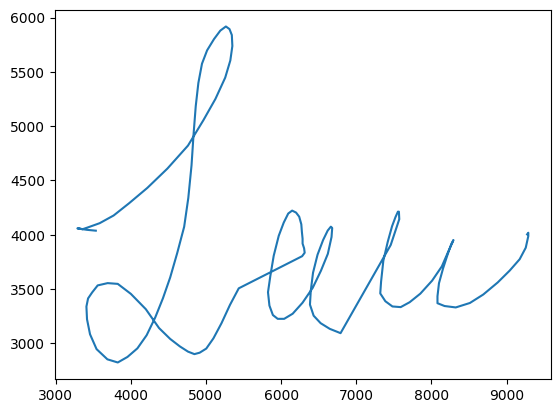

In [12]:
import matplotlib.pyplot as plt
s_id = 10
len_sig = int(x_train_len[s_id])
plt.plot(x_train[s_id,:len_sig,0], x_train[s_id, :len_sig,1])

In [13]:
for i in range(x_train.shape[0]):
  len_tmp = int(x_train_len[i])
  h_min = np.min(x_train[i,:len_tmp,0])
  h_max = np.max(x_train[i,:len_tmp,0])
  v_min = np.min(x_train[i,:len_tmp,1])
  v_max = np.max(x_train[i,:len_tmp,1])
  w_h_ratio = (v_max - v_min) / (h_max - h_min)
  x_train[i,:len_tmp,0] = (x_train[i,:len_tmp,0] - h_min) / (h_max - h_min)
  x_train[i,:len_tmp,1] = (x_train[i,:len_tmp,1] - v_min) / (v_max - v_min) * w_h_ratio

for i in range(x_test.shape[0]):
  len_tmp = int(x_test_len[i])
  h_min = np.min(x_test[i,:len_tmp,0])
  h_max = np.max(x_test[i,:len_tmp,0])
  v_min = np.min(x_test[i,:len_tmp,1])
  v_max = np.max(x_test[i,:len_tmp,1])

  w_h_ratio = (v_max - v_min) / (h_max - h_min)

  x_test[i,:len_tmp,0] = (x_test[i,:len_tmp,0] - h_min) / (h_max - h_min)
  x_test[i,:len_tmp,1] = (x_test[i,:len_tmp,1] - v_min) / (v_max - v_min) * w_h_ratio


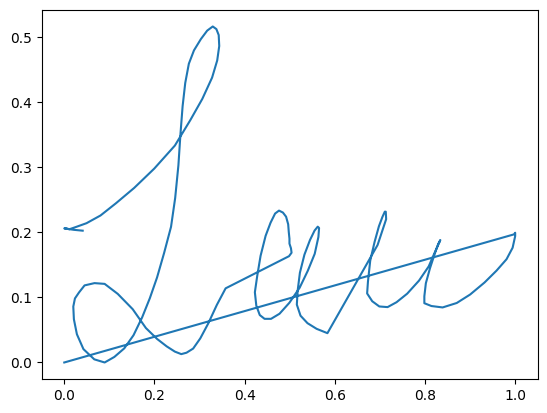

In [14]:
import matplotlib.pyplot as plt
s_id = 10
plt.plot(x_train[s_id,:,0],x_train[s_id,:,1])

In [15]:
import pandas as pd
from tensorflow import keras

y_pd = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/pknu-deep-learning-2024/train_info.csv')
y_all = np.array(y_pd['bGenuine'])
y_train = y_all[:n_train]
y_train_cat = keras.utils.to_categorical(y_train)
# y_test = y_all[:n_train]


In [205]:
from keras.layers import *
from keras.models import Model
from keras import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import random
import tensorflow as tf

seed_num = 71
random.seed(seed_num)

tf.random.set_seed(seed_num)

# def residual_block(x, filters, kernel_size=3, padding='same', activation='relu'):
#     res = Conv1D(filters, kernel_size=kernel_size, padding=padding)(x)
#     res = BatchNormalization()(res)
#     res = Activation(activation)(res)

#     res = Conv1D(filters, kernel_size=kernel_size, padding=padding)(res)
#     res = BatchNormalization()(res)

#     shortcut = Conv1D(filters, kernel_size=1, padding=padding)(x)
#     shortcut = BatchNormalization()(shortcut)

#     output = Add()([res, shortcut])
#     output = Activation(activation)(output)
#     return output

# input_layer = Input(shape=(x_train.shape[1], x_train.shape[2]))

# # Gaussian noise layer
# x = GaussianNoise(0.1)(input_layer)

# # Residual blocks with increasing filters
# x = residual_block(x, 16)
# x = MaxPooling1D(pool_size=2)(x)
# x = residual_block(x, 32)
# x = MaxPooling1D(pool_size=2)(x)
# x = residual_block(x, 64)
# x = MaxPooling1D(pool_size=2)(x)
# x = residual_block(x, 128)
# x = MaxPooling1D(pool_size=2)(x)

# # Bi-directional LSTM layers
# x = Bidirectional(LSTM(128, return_sequences=True))(x)
# x = Bidirectional(LSTM(128))(x)

# # Fully connected layers with Dropout
# x = Flatten()(x)
# x = Dropout(0.5)(x)
# x = Dense(256, activation='relu')(x)  # Increased number of units
# x = Dropout(0.5)(x)
# x = Dense(128, activation='relu')(x)
# x = Dropout(0.5)(x)
# output_layer = Dense(2, activation='softmax')(x)

# # Create model
# model = Model(inputs=input_layer, outputs=output_layer)

# # Compile model with a learning rate scheduler
# initial_learning_rate = 0.001
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=100000,
#     decay_rate=0.96,
#     staircase=True)

# optimizer = Adam(learning_rate=lr_schedule)
# model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# # Callbacks for early stopping and model checkpoint
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# # Train model
# hist = model.fit(
#     x=x_train, y=y_train_cat,
#     epochs=100,
#     validation_split=0.3,
#     batch_size=64,  # Increased batch size
#     callbacks=[early_stopping, model_checkpoint]
# )

# # Load the best model
# model.load_weights('best_model.h5')

# # Evaluate model
# # score = model.evaluate(x_test, y_test_cat)
# # print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


model = Sequential()
model.add(Conv1D(16, kernel_size=9, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv1D(16, kernel_size=9, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=9, strides=2))

model.add(Conv1D(32, kernel_size=9, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv1D(32, kernel_size=9, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=9, strides=2))

model.add(Conv1D(64, kernel_size=9, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv1D(64, kernel_size=9, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=9, strides=2))

model.add(Bidirectional(LSTM(128)))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(units=64, activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(units=2, activation='softmax'))

optimizer = Adam(learning_rate=0.001)  # 학습률을 낮춤
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


hist = model.fit(x=x_train, y=y_train_cat, epochs=300, validation_split=0.3, batch_size=32)




Epoch 1/300
18/18 [==============================] - 13s 82ms/step - loss: 0.7488 - accuracy: 0.5071 - val_loss: 0.6931 - val_accuracy: 0.5042
Epoch 2/300
18/18 [==============================] - 0s 23ms/step - loss: 0.6684 - accuracy: 0.6000 - val_loss: 0.6936 - val_accuracy: 0.4958
Epoch 3/300
18/18 [==============================] - 0s 23ms/step - loss: 0.6302 - accuracy: 0.6518 - val_loss: 0.7043 - val_accuracy: 0.4958
Epoch 4/300
18/18 [==============================] - 1s 31ms/step - loss: 0.5700 - accuracy: 0.7179 - val_loss: 0.6929 - val_accuracy: 0.4958
Epoch 5/300
18/18 [==============================] - 1s 36ms/step - loss: 0.5332 - accuracy: 0.7536 - val_loss: 0.6922 - val_accuracy: 0.5125
Epoch 6/300
18/18 [==============================] - 1s 39ms/step - loss: 0.4994 - accuracy: 0.7536 - val_loss: 0.6969 - val_accuracy: 0.4958
Epoch 7/300
18/18 [==============================] - 1s 30ms/step - loss: 0.4089 - accuracy: 0.8143 - val_loss: 0.7085 - val_accuracy: 0.4958
Epoch

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

def drawHistory(hist) :

  # hist.history를 데이터프레임으로 변환
  history_df = pd.DataFrame(hist.history)

  # 데이터프레임을 표로 출력
  print(history_df)

  # 데이터프레임을 시각화 (옵션)
  plt.figure(figsize=(12, 6))

  # 훈련 손실과 검증 손실 그래프
  plt.subplot(1, 2, 1)
  plt.plot(history_df['loss'], label='Training Loss')
  plt.plot(history_df['val_loss'], label='Validation Loss')
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  # 훈련 정확도와 검증 정확도 그래프
  plt.subplot(1, 2, 2)
  plt.plot(history_df['accuracy'], label='Training Accuracy')
  plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

plt.show()



         loss  accuracy  val_loss  val_accuracy
0    0.748823  0.507143  0.693134      0.504167
1    0.668385  0.600000  0.693640      0.495833
2    0.630151  0.651786  0.704297      0.495833
3    0.570013  0.717857  0.692905      0.495833
4    0.533200  0.753571  0.692199      0.512500
..        ...       ...       ...           ...
295  0.013264  0.994643  0.582447      0.854167
296  0.027830  0.991071  0.973639      0.804167
297  0.082594  0.971429  0.623530      0.850000
298  0.066290  0.976786  0.529810      0.829167
299  0.056298  0.975000  0.649714      0.816667

[300 rows x 4 columns]


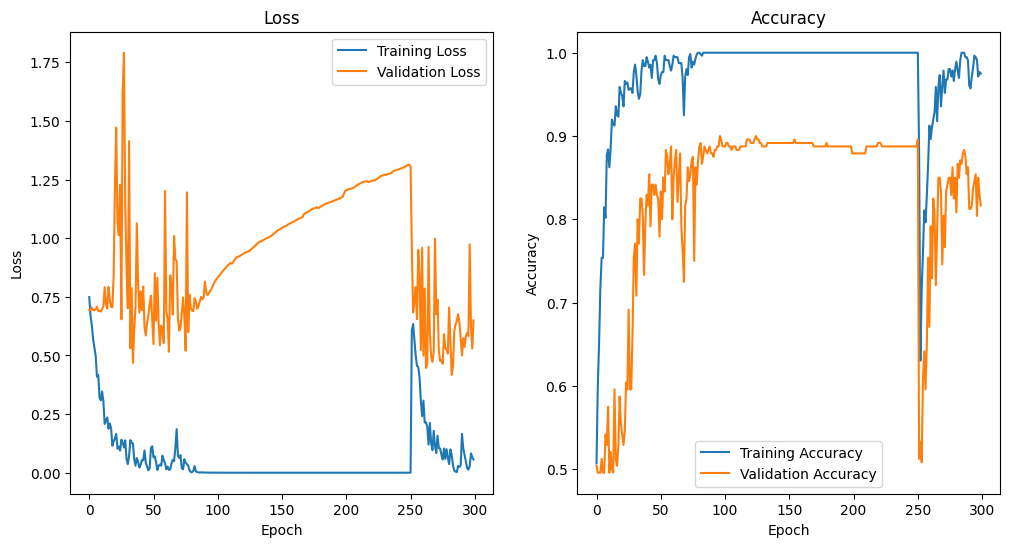

In [207]:
drawHistory(hist)

In [208]:
o = model.predict(x_test)

25/25 [==============================] - 1s 8ms/step


In [209]:
o = np.argmax(o,1)

In [210]:
df = pd.DataFrame(o)
df.columns = ['bGenuine']
df.index = range(800, 800+len(df))
df.index.name = 'num'
print(df)
df.to_csv('test_predict.csv')

      bGenuine
num           
800          1
801          0
802          1
803          1
804          0
...        ...
1595         0
1596         1
1597         1
1598         0
1599         1

[800 rows x 1 columns]


In [211]:
!kaggle competitions submit -c pknu-deep-learning-2024 -f test_predict.csv -m "Message"

100% 5.29k/5.29k [00:00<00:00, 5.97kB/s]
400 - Bad Request - Submission not allowed:  Your team has used its daily Submission allowance (20) today, please try again tomorrow UTC (5.0 hours from now).


In [ ]:
cp finalProject.ipynb /content/gdrive/MyDrive/colab_repo_for_deep_learning/finalProject.ipynb

In [ ]:
cd ../colab_repo_for_deep_learning/

/content/gdrive/MyDrive/colab_repo_for_deep_learning


In [ ]:
!git add *

In [ ]:
!git commit -m "commit"

[main 37ab003] commit
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite finalProject.ipynb (96%)


In [ ]:
!git config --global user.email "wkdghdwns199@naver.com"

In [ ]:
!git config --global user.name "Jang Hong Joon"

In [ ]:
!git push origin main

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 169.72 KiB | 7.71 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/wkdghdwns199/colab_repo_for_deep_learning.git
   3251afa..37ab003  main -> main
